In [39]:
import os
import skimage.data
import matplotlib
import matplotlib.pyplot as plt
import skimage.transform
import numpy as np
import csv
import random

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json

from sklearn.model_selection import train_test_split

In [40]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir)
                  if os.path.isdir(os.path.join(data_dir, d))]
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f)
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 10
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

In [41]:
train_images,train_labels = load_data('E:\GTSRB\Final_Training\Images')

In [42]:
images64 = [skimage.transform.resize(image, (64,64)) for image in train_images]

In [43]:
y = np.array(train_labels)
x_train = np.array(images64)
num_categories = 43
y_train = to_categorical(y, num_categories)

X_train,X_Test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2)

X_train = X_train.reshape(-1,64, 64, 3)   #Reshape for CNN -  should work!!
X_Test = X_Test.reshape(-1,64, 64, 3)

### This part of the code is just for initial training of the network and once trained the weights and the model hierarchy are stored in json file and model weights are loaded in .h5 file and then are loaded for application purpose.

In [6]:
# inputs = Input(shape=(64,64,3))

# x = Convolution2D(32, 4,4, border_mode='same', activation='relu')(inputs)
# x = Convolution2D(32, 4,4, border_mode='same', activation='relu')(x)
# x = Convolution2D(32, 4,4, border_mode='same', activation='relu')(x)
# x = MaxPooling2D(pool_size=(2,2))(x)
# x = Dropout(0.25)(x)

# # one more block
# x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
# x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)
# x = Flatten()(x)

# # fully connected, 256 nodes
# x = Dense(256, activation='relu')(x)

# x = Dropout(0.50)(x)

# # softmax activation, 6 categories
# predictions = Dense(43, activation='softmax')(x)

# model = Model(input=inputs, output=predictions)
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit(X_train, Y_train, nb_epoch=15, batch_size=100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), activation="relu", padding="same")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Model` call t

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
31367/31367 [==============================] - 122s 4ms/step - loss: 1.7454 - acc: 0.5303
Epoch 2/15
31367/31367 [==============================] - 50s 2ms/step - loss: 0.2230 - acc: 0.9372
Epoch 3/15
31367/31367 [==============================] - 50s 2ms/step - loss: 0.0995 - acc: 0.9725
Epoch 4/15
31367/31367 [==============================] - 51s 2ms/step - loss: 0.0634 - acc: 0.9824
Epoch 5/15
31367/31367 [==============================] - 51s 2ms/step - loss: 0.0467 - acc: 0.9871
Epoch 6/15
31367/31367 [==============================] - 51s 2ms/step - loss: 0.0430 - acc: 0.9886
Epoch 7/15
31367/31367 [==============================] - 53s 2ms/step - loss: 0.0375 - acc: 0.9900
Epoch 8/15
31367/31367 [==============================] - 52s 2ms/step - loss: 0.0309 - acc: 0.9919
Epoch 9/15
31367/31367 [==============================] - 52s 2ms/step - loss: 0.0361 - acc: 0.9910
Epoch 10/15
31367/31367 [==========================

In [44]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = model.evaluate(X_Test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 99.99%


In [46]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


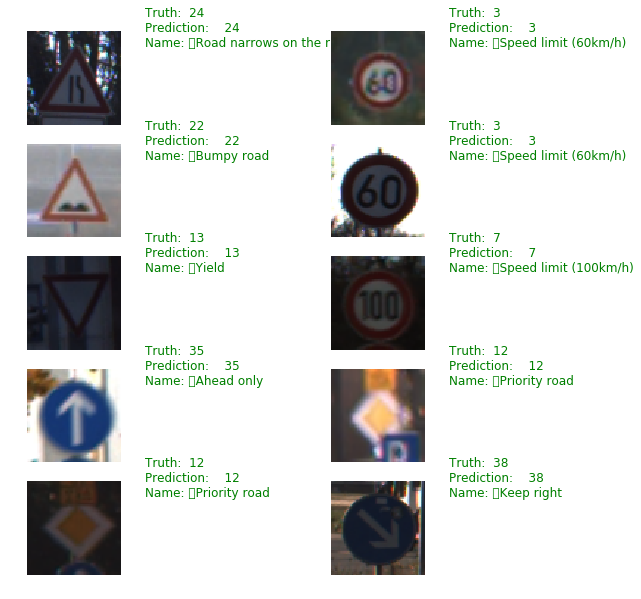

In [47]:
Signnames = np.loadtxt('./signnames.txt',delimiter = ',',dtype = {'names': ('classid','Name'),'formats':('i4','S100')})
random.seed(3)
sample_indexes = random.sample(range(len(X_Test)), 10)
sample_images = [X_Test[i] for i in sample_indexes]
sample_labels = [Y_test[i] for i in sample_indexes]
#get the indices of the array using argmax
ground_truth = np.argmax(sample_labels, axis=1)
X_sample = np.array(sample_images)
prediction = model.predict(X_sample)
predicted_categories = np.argmax(prediction, axis=1)
# Display the predictions and the ground truth visually.
def display_prediction (images, true_labels, predicted_labels,Signnames):
    fig = plt.figure(figsize=(10, 10))
    Signnames=Signnames
    for i in range(len(true_labels)):
        truth = true_labels[i]
        prediction = predicted_labels[i]
        plt.subplot(5, 2,1+i)
        plt.axis('off')
        color='green' if truth == prediction else 'red'
        plt.text(80, 10, "Truth:  {0}\nPrediction:    {1}\nName: {2}".format(truth, prediction, Signnames[truth][1].decode('UTF-8')),fontsize=12, color=color)
#         plt.text(80, 10, "Truth:  {0}\nPrediction:    {1}".format(truth, prediction),fontsize=12, color=color)
        plt.imshow(images[i])
        
display_prediction(sample_images, ground_truth, predicted_categories,Signnames)